# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 4. Доверительные интервалы
### Дедлайн --- 29 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. **Пожалуйста, не стирайте условия задач и не переименовывайте ноутбук!**

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

from tqdm.notebook import tqdm
from typing import Callable

sns.set(font_scale=1.4, style='whitegrid', palette='Set2')

## Задача 1

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал оценки $\widehat{\theta}$
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

In [2]:
N = 100
alpha = 0.95
theta = 10

def draw_confidence_interval(statistic, conf_interval, sample, config):
    plt.figure(figsize=(12, 10))
    plt.title(f'{config["distr"]} сonfidence-{alpha} interval for $\\theta$ = {theta}')
    plt.scatter(np.arange(N) + 1, sample, label="sample")
    plt.plot(np.arange(N) + 1, statistic, label=config['stat'], c='r')
    plt.fill_between(np.arange(N) + 1, conf_interval[0], conf_interval[1], alpha=0.2)
    plt.xlabel('sample size')
    if config['ylim'] is not None:
        plt.ylim(top=config['ylim'])
    plt.legend()
    plt.show()

Выполните задание для следующих $P_\theta$ и $\widehat{\theta}$ (формулы доверительных итервалов были получены на семинарах):

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

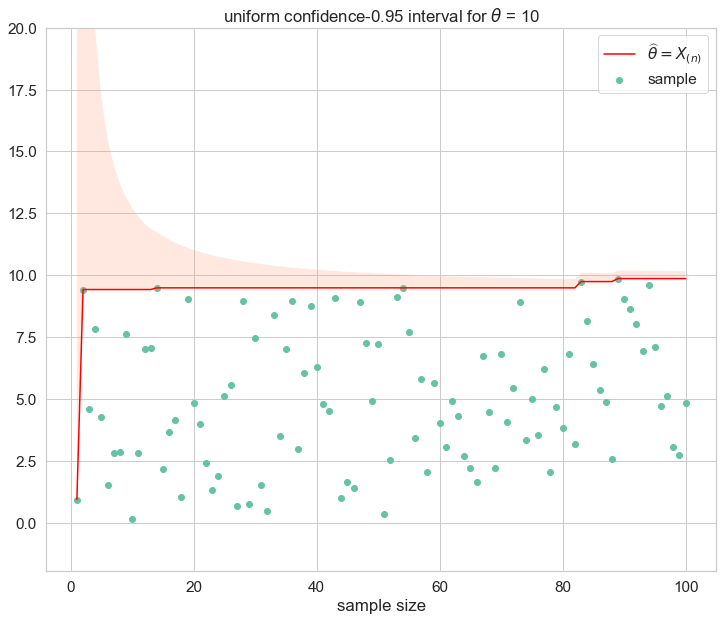

In [3]:
def get_uniform_params(alpha, N):
    sample = sps.uniform.rvs(scale=theta, size=N)
    statistic = np.maximum.accumulate(sample)
    n = np.arange(N) + 1
    low_interval = statistic
    upper_interval = statistic / (1 - alpha)**(1 / n)
    return statistic, (low_interval, upper_interval), sample

    
config = {'stat': '$\widehat{\\theta} = X_{(n)}$', 'distr': 'uniform', 'ylim': 20}
draw_confidence_interval(*get_uniform_params(alpha, N), config)

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

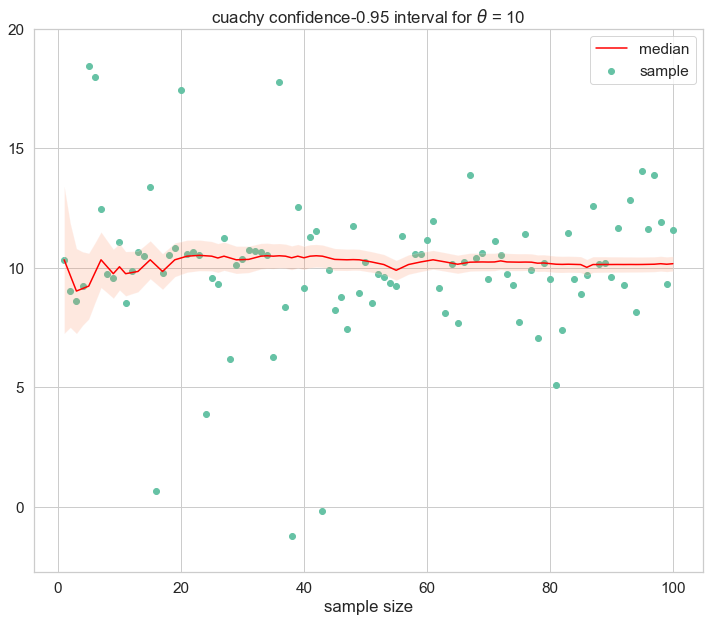

In [4]:
def get_cuachy_params(alpha, N):
    sample = sps.cauchy.rvs(theta, size=N)  
    n = np.arange(N) + 1
    statistic = np.array([np.median(sample[:i]) for i in n])
    
    low_interval = statistic - sps.norm.ppf((1 + alpha) / 2) / np.sqrt(n) * np.pi / 2
    upper_interval = statistic - sps.norm.ppf((1 - alpha) / 2) / np.sqrt(n) * np.pi / 2 
    return statistic, (low_interval, upper_interval), sample

    
config = {'stat': 'median', 'distr': 'cuachy', 'ylim': 20}
draw_confidence_interval(*get_cuachy_params(alpha, N), config)

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

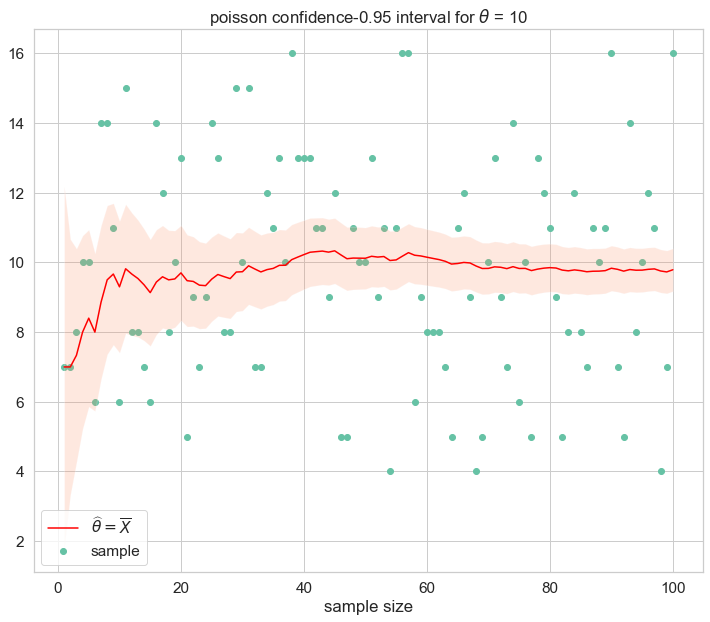

In [5]:
def get_poisson_params(alpha, N):
    sample = sps.poisson.rvs(theta, size=N)  
    n = np.arange(N) + 1
    statistic = np.cumsum(sample) / n
    low_interval = statistic - np.sqrt(statistic / n) * sps.norm.ppf((1 + alpha) / 2)
    upper_interval = statistic - np.sqrt(statistic / n) * sps.norm.ppf((1 - alpha) / 2)
    return statistic, (low_interval, upper_interval), sample

    
config = {'stat': '$\widehat{\\theta} = \overline{X}$', 'distr': 'poisson', 'ylim': None}
draw_confidence_interval(*get_poisson_params(alpha, N), config)

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

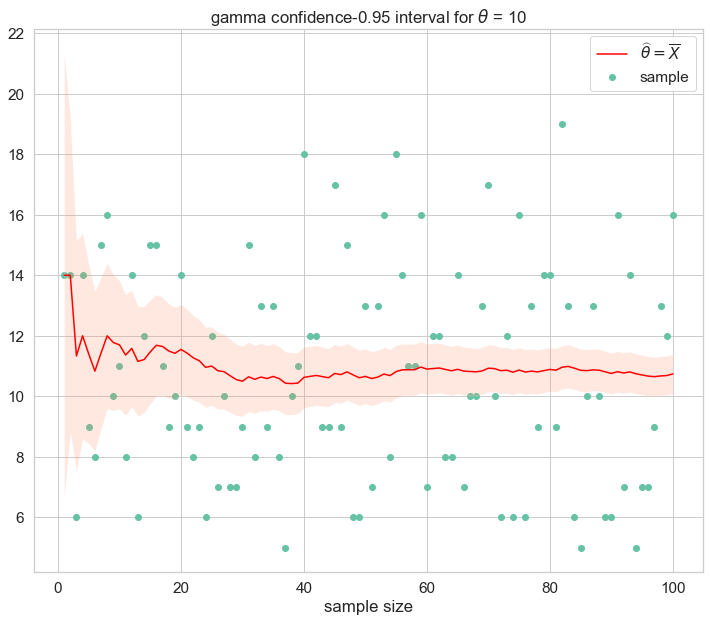

In [6]:
def get_gamma_params(alpha, N):
    sample = sps.gamma.rvs(theta, size=N, scale=1/3)  
    n = np.arange(N) + 1
    statistic = 3 * np.cumsum(sample) / n
    low_interval = statistic - np.sqrt(statistic / n) * sps.norm.ppf((1 + alpha) / 2)
    upper_interval = statistic - np.sqrt(statistic / n) * sps.norm.ppf((1 - alpha) / 2)
    return statistic, (low_interval, upper_interval), sample

    
config = {'stat': '$\widehat{\\theta} = \overline{X}$', 'distr': 'gamma', 'ylim': None}
draw_confidence_interval(*get_poisson_params(alpha, N), config)

Сделайте выводы о размерах и форме доверительных интервалов для каждого случая.

__Вывод__: Для всех доверительных интервалов можно сказать, что они сужаются с увеличением выборки, в частности из-за того, что использовались асимптотические интервалы. Самый узкий интервал у распредления Коши. Для всех распределений оценка лежит примерно посередине интервала, кроме равномерного, распределение не регулярно, поэтому со своими интервалами и лежит по нижней границе интервала.

# Задача 2

Для $n = 100$ оцените для кажого пункта предыдущей задачи вероятность попадания истинного значения
$\theta$ в интервал. Для этого нужно сделать слудующее:
1. Сгенерируйте достаточно много выборок из $P_{\theta}$
2. Постройте по каждой из них интервалы для $\widehat{\theta}$
3. Определите, сколько раз истинное значение $\theta.$ попадает в построенные интервалы. Таким способом будет
построена бернуллиевская выборка, по ней оцените вероятность.

Предположите, какое количество выборок нужно взять. Обоснуйте свой выбор.

__Ответ:__

In [7]:
sample_size = 10000

Так как альфа достаточно малое в интервал не попадёт порядка 5% оценок, поэтому взять 10000 выборок будет достаточно, чтобы получить неплохую точность в сотых. 

### Равномерное распределение

In [8]:
sample = sps.uniform.rvs(scale=theta, size=(sample_size, N))
statistic = np.max(sample, axis=1)
low_interval = statistic
upper_interval = statistic / (1 - alpha)**(1 / N)
prec = np.mean(np.logical_and(low_interval <= theta, theta <= upper_interval))
print(f"precision : {prec}")

precision : 0.9505


### Распределение Коши

In [9]:
sample = sps.cauchy.rvs(theta, size=(sample_size, N))
statistic = np.median(sample, axis=1)
low_interval = statistic - sps.norm.ppf((1 + alpha) / 2) / np.sqrt(N) * np.pi / 2
upper_interval = statistic - sps.norm.ppf((1 - alpha) / 2) / np.sqrt(N) * np.pi / 2 
prec = np.mean(np.logical_and(low_interval <= theta, theta <= upper_interval))
print(f"precision : {prec}")

precision : 0.947


### Распределение Пуассона

In [10]:
sample = sps.poisson.rvs(theta, size=(sample_size, N))
statistic = np.mean(sample, axis=1)
low_interval = statistic - np.sqrt(statistic / N) * sps.norm.ppf((1 + alpha) / 2)
upper_interval = statistic - np.sqrt(statistic / N) * sps.norm.ppf((1 - alpha) / 2)
prec = np.mean(np.logical_and(low_interval <= theta, theta <= upper_interval))
print(f"precision : {prec}")

precision : 0.951


### Гамма-распределение

In [11]:
sample = sps.gamma.rvs(theta, scale=1/3, size=(sample_size, N), )
statistic = 3 * np.mean(sample, axis=1)
low_interval = statistic - np.sqrt(statistic / N) * sps.norm.ppf((1 + alpha) / 2)
upper_interval = statistic - np.sqrt(statistic / N) * sps.norm.ppf((1 - alpha) / 2)
prec = np.mean(np.logical_and(low_interval <= theta, theta <= upper_interval))
print(f"precision : {prec}")

precision : 0.9485


Сделайте выводы.

__Вывод__: Точные интервалы в действительности дают нам вероятность попадения параметра в доверительный интервал примерно равную уровню доверия 0.95

# Задача 3

В этой задаче мы построим точный и асимптотический доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$


Для $n=30, \,a = 0$ постройте __на одном графике__ точный и асимптотический доверительный интервал, а также отметьте линией истинное значение $a$

$$\big( \overline{X} - \frac{\sigma u_{\frac{1 + \alpha}{2}}}{\sqrt{n}} , \overline{X} - \frac{\sigma u_{\frac{1 - \alpha}{2}}}{\sqrt{n}} \big)$$
$\sigma^2$ - дисперсия оценки.

__Асимптотический интервал__: $u_{\alpha}$ - квантиль нормального распределения.

__Точный интервал__: $u_{\alpha}$ - квантиль распределения Стьюдента степени свободы $n-1$.

In [12]:
def calculate_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление точного доверительного интервала уровня доверия alpha. """
    n = np.arange(len(sample)) + 1
    mean = sample.cumsum() / n
    var = np.sqrt((sample**2).cumsum() / n - mean**2)
    low_ppf = [sps.t(i - 1).ppf((1 + alpha) / 2) for i in n]
    upper_ppf = [sps.t(i - 1).ppf((1 - alpha) / 2) for i in n]
    low_interval = mean - low_ppf * var / np.sqrt(n)
    upper_interval = mean - upper_ppf * var / np.sqrt(n)
    return low_interval, upper_interval

In [13]:
def calculate_asymptotic_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление асимптотического доверительного интервала уровня доверия alpha. """
    n = np.arange(len(sample)) + 1
    mean = sample.cumsum() / n
    var = np.sqrt((sample**2).cumsum() / n - mean**2)
    low_interval = mean - sps.norm.ppf((1 + alpha) / 2) * var / np.sqrt(n)
    upper_interval = mean - sps.norm.ppf((1 - alpha) / 2) * var / np.sqrt(n)
    return low_interval, upper_interval

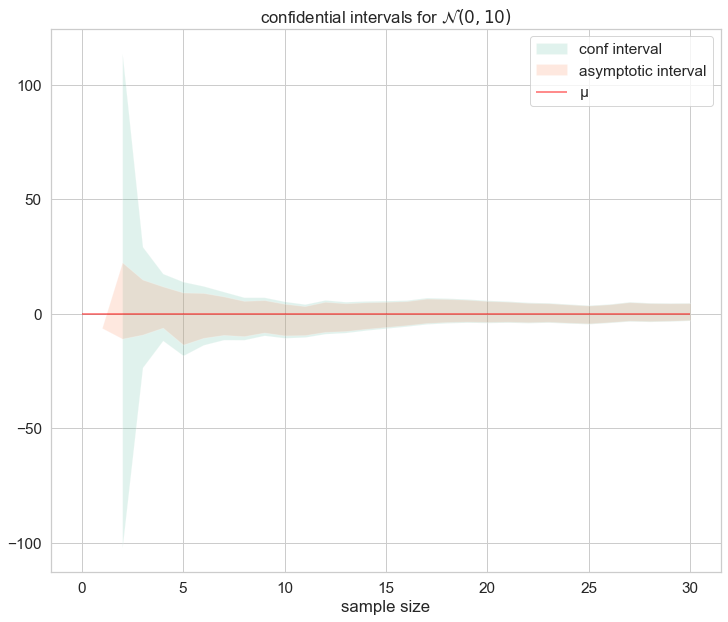

In [14]:
N = 30
scale = 10

sample = sps.norm.rvs(size=30, scale=scale)
conf_interval = calculate_conf_interval(sample)
asymptotic_conf_interval = calculate_asymptotic_conf_interval(sample)

plt.figure(figsize=(12, 10))

plt.fill_between(np.arange(N) + 1,
                 conf_interval[0],
                 conf_interval[1],
                 alpha=0.2,
                 label='conf interval'
                )

plt.fill_between(np.arange(N) + 1,
                 asymptotic_conf_interval[0],
                 asymptotic_conf_interval[1],
                 alpha=0.2,
                 label='asymptotic interval'
                )

plt.hlines(0, 0, N, color='red', alpha=0.6, label='μ')

plt.title('confidential intervals for $\mathcal{N}(0, 10)$')
plt.xlabel('sample size')

plt.legend()
plt.show()

Сделайте выводы. В каких случаях уместно использовать асимптотический интервал вместо точного?

__Вывод__:
Асимптотический интервал содержится строго внутри точного, и на небольшой выборке сильно отличается, что говорит нам о том, что асимптотический интервал не точен. При увеличеннной выборке интервалы становятся идентичными. Соответственно асимптотический интервал уместно использовать, когда данных много.

# Задача 4

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [15]:
!gdown https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC 

Downloading...
From: https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC
To: C:\Users\1\Desktop\прога\MIPT DS\Stats\city_day.csv

  0%|          | 0.00/2.57M [00:00<?, ?B/s]
 20%|##        | 524k/2.57M [00:00<00:00, 2.94MB/s]
 41%|####      | 1.05M/2.57M [00:00<00:00, 2.89MB/s]
 61%|######1   | 1.57M/2.57M [00:00<00:00, 2.92MB/s]
 81%|########1 | 2.10M/2.57M [00:00<00:00, 2.96MB/s]
100%|##########| 2.57M/2.57M [00:00<00:00, 3.01MB/s]
100%|##########| 2.57M/2.57M [00:00<00:00, 2.98MB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

In [16]:
data = pd.read_csv('city_day.csv')
data = data[['City', 'Date', 'AQI']]
data = data.dropna()
data['Date'] = pd.to_datetime(data['Date'])

Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

In [17]:
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [18]:
data = data[data['Date'] >= pd.Timestamp('2018-07')]
mumbai = data[data['City'] == 'Mumbai']
kolkata = data[data['City'] == 'Kolkata']

В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [19]:
def get_dataset_by_month(
    df: pd.DataFrame, 
    year: int,
    month: int
):
    """ Сохранение в массив данные для указанного месяца и года."""
    
    return df[np.logical_and(df['Year'] == year, df['Month'] == month)]

In [20]:
def get_bootstrap_samples(
    sample: np.ndarray,
    k: int = 1000
):
    """ Построение k бутстрепных выборок для указанной выборки. """
    
    ind = np.random.randint(low=0, high=len(sample), size=(k, len(sample)))
    return sample[ind]

In [21]:
def bootstrap_conf_interval(
    sample: np.ndarray,
    estimator: Callable = lambda x: np.mean(x, axis=-1),
    alpha: float = 0.95,
):
    """ Построение бутстрепных доверительных интервалов. """
    bs = get_bootstrap_samples(sample)
    stats = np.mean(bs, axis=1)
    stat_distr_func = np.sort(stats)
    return [stat_distr_func[int(bs.shape[0] * (1 - alpha) / 2)], stat_distr_func[int(bs.shape[0] * (1 + alpha) / 2)]]

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

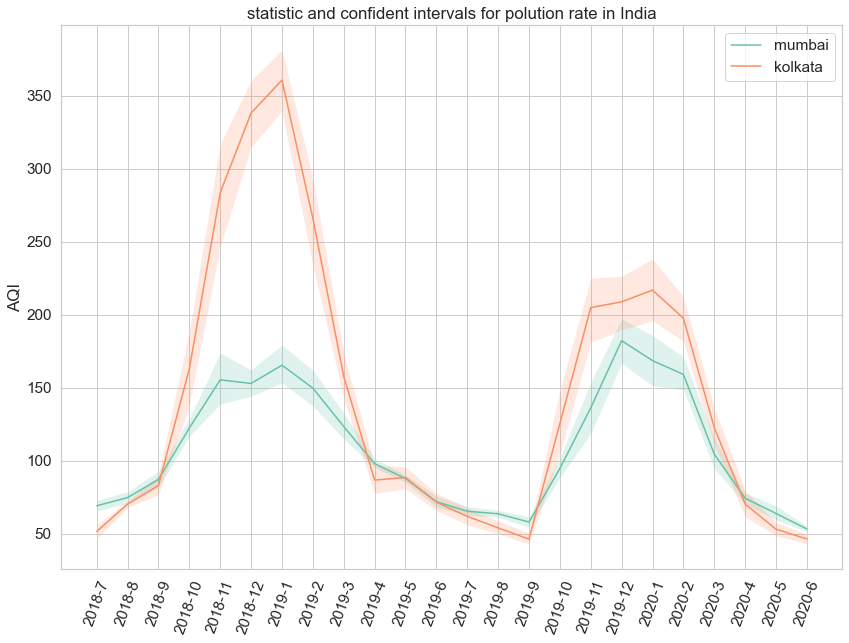

In [22]:
ym = mumbai[['Year', 'Month']].drop_duplicates().values[:-1]
labels = [f"{year}-{month}" for year, month in ym] # номера месяцев для подписей на графике 

means_m, means_k = [], []
intervals_m, intervals_k = [], []

for year, month in ym:
    df = get_dataset_by_month(mumbai, year, month)
    means_m.append(np.mean(df['AQI']))
    intervals_m.append(bootstrap_conf_interval(np.array(df['AQI'])))
    
    df = get_dataset_by_month(kolkata, year, month)
    means_k.append(np.mean(df['AQI']))
    intervals_k.append(bootstrap_conf_interval(np.array(df['AQI'])))

    
plt.figure(figsize=(14, 10))
plt.plot(labels, means_m, label='mumbai')
plt.fill_between(labels, np.array(intervals_m)[:, 0], np.array(intervals_m)[:, 1], alpha=0.2)
plt.plot(labels, means_k, label='kolkata')
plt.fill_between(labels, np.array(intervals_k)[:, 0], np.array(intervals_k)[:, 1], alpha=0.2)

plt.xticks(rotation=70)
plt.ylabel('AQI')
plt.title('statistic and confident intervals for polution rate in India')
plt.legend()
plt.show()

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

Видно, что в зимний период присутствует скачок загрязнения. Это может быть связано с отопительным сезоном.

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

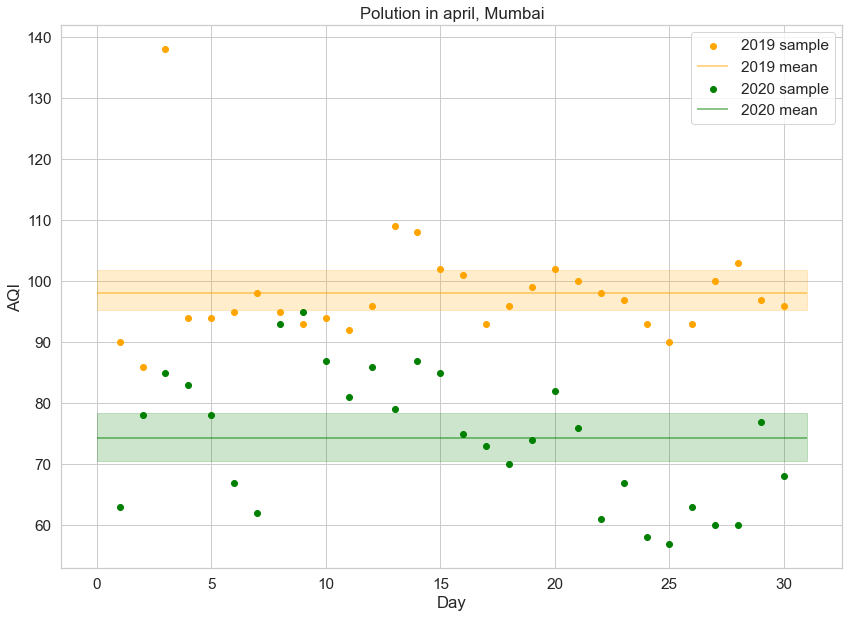

In [23]:
month = 4
plt.figure(figsize=(14, 10))

for year, color in zip([2019, 2020], ['orange', 'green']):
    df = get_dataset_by_month(mumbai, year, month)
    mean = np.mean(df['AQI'])
    interval = bootstrap_conf_interval(np.array(df['AQI']))

    plt.scatter(df['Date'].dt.day, df['AQI'], color=color, label=f'{year} sample')
    plt.fill_between([0, 31], np.full(2, interval[0]), np.full(2, interval[1]), alpha=0.2, color=color)
    plt.hlines(mean, 0, 31, alpha=0.6, color=color, label=f'{year} mean')

plt.title("Polution in april, Mumbai")
plt.ylabel('AQI')
plt.xlabel('Day')
plt.legend()
plt.show()

Теперь проделайте то же самое для Калькутты

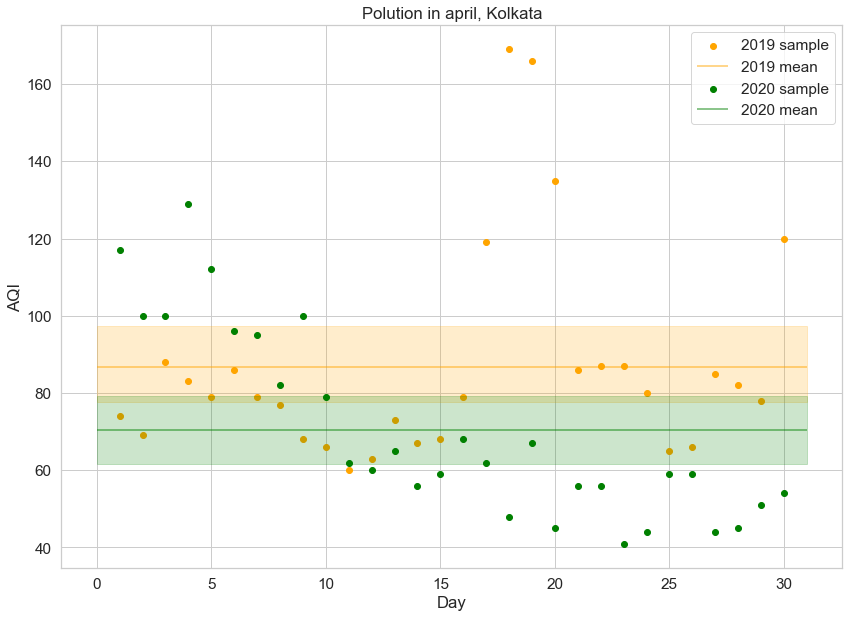

In [24]:
month = 4
plt.figure(figsize=(14, 10))

for year, color in zip([2019, 2020], ['orange', 'green']):
    df = get_dataset_by_month(kolkata, year, month)
    mean = np.mean(df['AQI'])
    interval = bootstrap_conf_interval(np.array(df['AQI']))

    plt.scatter(df['Date'].dt.day, df['AQI'], color=color, label=f'{year} sample')
    plt.fill_between([0, 31], np.full(2, interval[0]), np.full(2, interval[1]), alpha=0.2, color=color)
    plt.hlines(mean, 0, 31, alpha=0.6, color=color, label=f'{year} mean')

plt.title("Polution in april, Kolkata")
plt.ylabel('AQI')
plt.xlabel('Day')
plt.legend()
plt.show()

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев?

__Вывод__:
Можно сказать, что для Мумбаи  доверительные интервалы уже, то есть среднее более точное. В апреле 2020 года в Мумбаи сильно упало загрязнение по сравнению с предыдущим годом, интервалы не пересекаются. В Калькутте так же снизилось загрязнение, однако не так сильно, доверительные интервалы пересекаются, что так же говорит о том, что падение не так значительно.